In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.seterr(divide='ignore')#ignore warning of zeros division

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
#initial solution that i want to start 

In [4]:
x=2
y=1

In [5]:
#Objective function

In [6]:
z=((x**2)+y-11)**2+(x+(y**2)-7)**2

In [7]:
print()
print()
print('initial sol of x: %0.3f'%x)
print('initial sol of y: %0.3f'%y)
print('initial sol of z: %0.3f'%z)



initial sol of x: 2.000
initial sol of y: 1.000
initial sol of z: 52.000


Now for simulated annealing and other neighborhood search problems, or Maduka rustics?

You always start at one point, one solution.

And from that starting point in your search space, you start moving around to your neighborhood solutions,

you start looking around for better solutions for worst and so on, like if you go to a worse solution,

should we take it or not?
Sometimes takes bad solution is good as from there we can get better potential solution

# Hyperparameter

In [8]:
#User inputted parameter
T0=1000
#For plotting purposes
temp_for_plot=T0
#How many times we want to decrease temperature
M=300
#For each M how many times we want to search neighbourhood
N=15
#by how much do we want to decrease the temp
alpha=0.85
#helps to reduce stepsize
k=1

In [9]:
temp=[]#to plot the temperature
obj_val=[]#to plot the obj val reached at the end of each M

In [10]:
for i in range(M):#how many times to decrease the temp
    for j in range(N):#for each M how many neighbourhood searches
        #for the decision variables or solutions X
        rand_num_x_1=np.random.rand()
        rand_num_x_2=np.random.rand()
        if rand_num_x_1>=0.5:
            step_size_x=k*rand_num_x_1
        else:
            step_size_x=-k*rand_num_x_2
        #for the decision variables y
        rand_num_y_1=np.random.rand()
        rand_num_y_2=np.random.rand()
        if rand_num_y_1>=0.5:
            step_size_y=k*rand_num_y_1
        else:
            step_size_y=-k*rand_num_y_2
        #temporary because we still need to know if we should take this new solution or stay where we are and look again
        x_temporary=x+step_size_x
        y_temporary=y+step_size_y
        #the possible new move with the temporary values need to see if better or worse than where we currently are 
        obj_val_possible=((x_temporary**2)+y_temporary-11)**2+(x_temporary+(y_temporary**2)-7)**2
        #where we are currently
        obj_val_current=Z=((x**2)+y-11)**2+(x+(y**2)-7)**2
        #in case our possible solutions in worse, we need to figure out if we should take it or not
        rand_num=np.random.rand()
        #if the possible solution is worse, with the help of random number above we will let a formula decide if we take it or stay where we are
        #the closer we get to end of our search(the lower temp. value), it will be be less likely to take worse solutions because the random number will most likely be greater
        formula=1/(np.exp((obj_val_possible-obj_val_current)/T0))
        #can we change our current solution with next potential solution
        if obj_val_possible<=obj_val_current:
            x=x_temporary
            y=y_temporary 
        elif rand_num<=formula:
            x=x_temporary
            y=y_temporary
        else:
            x=x
            y=y
    temp.append(T0)
    obj_val.append(obj_val_current)
    T0=alpha*T0

C:\Users\RUKHSU~1\AppData\Local\Temp/ipykernel_17384/3582585724.py:28: RuntimeWarning: overflow encountered in exp
  formula=1/(np.exp((obj_val_possible-obj_val_current)/T0))


In [11]:
print()
print()
print()
print('initial sol of x: %0.3f'%x)
print('initial sol of y: %0.3f'%y)
print('Objective value is : %0.3f'%obj_val_current)




initial sol of x: 2.765
initial sol of y: 2.027
Objective value is : 1.777


# Plotting

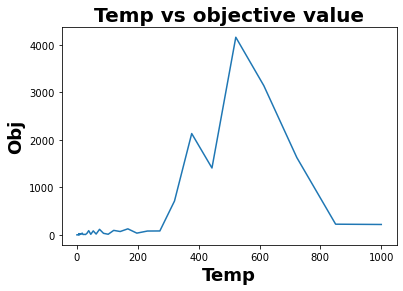

In [12]:
plt.plot(temp,obj_val)
plt.title("Temp vs objective value",fontsize=20,fontweight='bold')
plt.xlabel("Temp",fontsize=18,fontweight='bold')
plt.ylabel("Obj",fontsize=18,fontweight='bold')
plt.show()